<a href="https://colab.research.google.com/github/PankajSingh013/NLP/blob/main/covid_tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corona Tweets Sentiment Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin')

In [3]:
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
df.shape

(41157, 6)

In [11]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [13]:
#checking the null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

## Exploring the labels

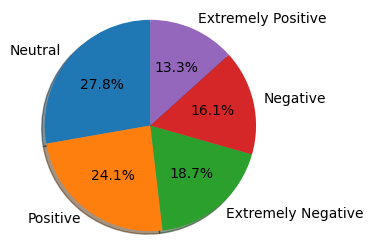

In [6]:
#Check Tweets distrubution
counts = df.Sentiment.value_counts()
#converting pd object to list of string
label_types = df.Sentiment.unique().astype(str)
sizes = [count for count in counts]

#declare a fig with custom size
fig = plt.figure(figsize = (3,3))
plt.pie(sizes, labels = label_types , autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [8]:
df[df['Sentiment'] == 'Positive']['Sentiment'].shape

(11422,)

In [9]:
df['Sentiment'][df['Sentiment'] == 'Negative'].shape


(9917,)

In [7]:
df_test = pd.read_csv('Corona_NLP_test.csv',encoding = 'latin')
df_test.shape

(3798, 6)

In [ ]:
df_test["Sentiment"].unique()

In [4]:
all_positive_tweets = df[df['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)

In [ ]:
all_positive_tweets[111]

In [5]:
all_negative_tweets = df[df['Sentiment'] == 'Negative']['OriginalTweet'].astype(str)

In [ ]:
all_negative_tweets

In [17]:
#things to do for pre-processing of tweets before model building
# - removing urls
# - removing # tags with ""
# removing Retweet : RE[\s]
# removing @tags which is used to tag peoples
# removing stopwords and punctuations
# taking the lema or root of words sometimes: using stemming or lematization
# and then finally tokenizing the data points


In [6]:
import re
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
def process_tweets(tweet):

    stemmer = PorterStemmer()

    #removing old stype re-tweets
    tweet = re.sub(r'RT[\s]+','',tweet)
    #removing hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+','',tweet)
    #removing hastags #
    tweet = re.sub(r'#','',tweet)
    #tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len = True, strip_handles=True)
    token_list = tokenizer.tokenize(tweet)

    #stopwords defining
    stopword_list = stopwords.words('english')
    clean_tweet = []
    for token in token_list:
        if token not in stopword_list and token not in string.punctuation:
            #taking the stem of token
            stem_word = stemmer.stem(token)
            clean_tweet.append(stem_word)

    return clean_tweet




In [20]:
process_tweets(all_positive_tweets[111])

['supermarket',
 'la',
 'habra',
 'tri',
 'help',
 'local',
 'senior',
 'covid',
 '19',
 'pandem',
 'open',
 'door',
 'half-hour',
 'earli',
 'day',
 'exclus',
 'shopper',
 '65',
 'older']

In [21]:
#we can also use our own tokenizer using str.split() method.
# in nltk.tokenizer we have wordtokenize also

# How to convert our english text tweets into numerical form so that we can train our model?

In [22]:
# simpletes way is to use some rule based technique
# we can use word embeeding techniques like BOW or TFIDF: they don't capture the semantic meaning


In [24]:
#we can do sparse representation of texts by maintaining a unique vocab of all the tweets and then count them in
# datapoint. But it will create features with lot of zeros
# our logistic regression model will have to learn n+1 parameters where n = size of vocab
#for large vocab size this can be a probem

In [23]:
#LEts use some Feature Extraction technique
# instead of having a word vector of dimention v, lets create a 3 dimention vector pr 3 columns as follows;
#create a dictonary to store form (word, positive): count and (word,negative):count
# 3 dimetions will be :: count_positive, count_negative, bias.. Using this 3 vectors we train our model


Build frequency dictionary

In [9]:
def build_freqs(tweets,ys):
    pass
    #tweets will be list of all tweets
    #ys: y labels of size mx1 array for the corresponding tweets
    #covert the ys to a list and squeeze it also
    yslist = np.squeeze(ys).tolist()
    #creating dictionary
    freqs = {}
    for y,tweet in zip(yslist,tweets):
        for word in process_tweets(tweet):
            if (word,y) not in freqs:
                freqs[(word,y)] = 0
            else:
                freqs[(word,y)] += 1

    return freqs




In [10]:
positive_tweets = list(all_positive_tweets)
negative_tweets = list(all_negative_tweets)

In [11]:
type(positive_tweets)

list

In [12]:
training_tweets = positive_tweets + negative_tweets
#making a numpy array representing label of tweets
labels = np.append(np.ones(len(positive_tweets)),np.zeros(len(negative_tweets)))

In [29]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [30]:
training_tweets[0]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [13]:
#creating fequency dictionary
freqs = build_freqs(training_tweets,labels)
print(type(freqs))
print(len(freqs))

<class 'dict'>
35134


In [32]:
freqs[('contact',1)]

124

In [33]:
freqs[('contact',0)]

79

In [34]:
#now our freq dictionary is ready. our next task is to crete 3D features for each datapoint in below form
#x= bias=1, sum_all_positive_frequencies,sum_all_negative_frequencies

In [19]:
def extract_features(tweet,freqs):

    word_l = process_tweets(tweet)
    x = np.zeros((1,3))

    x[0,0] = 1

    for word in word_l:
        x[0,1] += freqs.get((word,1.0),0)  #increment word count for +ve label
        x[0,2] += freqs.get((word,0.0),0)  #increment word count for -ve label

    return x

In [20]:
extract_features("this batch is good",freqs)

array([[  1., 482., 251.]])

In [23]:
#making the training data
train_x = training_tweets
X = np.zeros((len(train_x),3))
#collecting the feature x and training them in a matrix x
for i in range(len(train_x)):
    X[i,:] = extract_features(train_x[i],freqs)


In [25]:
y_train = np.append(np.ones(len(positive_tweets)),np.zeros(len(negative_tweets)))
Y = y_train.flatten()

Training a Logistic regression model


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,Y)

LogisticRegression()

In [31]:
print('Training accuracy',clf.score(X,Y))

Training accuracy 0.6188668634893856


In [32]:
#our very simple feature engineered model is giving an accuracy of 61% on training data..

In [35]:
#lets check accuracy on test data
df_test = pd.read_csv('Corona_NLP_test.csv')
test_positive = list(df_test[df_test['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))
test_negative = list(df_test[df_test['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))
testing_tweets_x = test_positive + test_negative
X_test = np.zeros((len(testing_tweets_x),3))

for i in range(len(testing_tweets_x)):
    X_test[i,:] = extract_features(testing_tweets_x[i],freqs)

y_test = np.append(np.ones(len(test_positive)),np.zeros(len(test_negative)))
Y_test = y_test.flatten()


In [37]:
print("Test data accuracy is: ", clf.score(X_test,Y_test))

Test data accuracy is:  0.5699195171026157


Predicting wheather a tweet is positive or not


In [38]:
def predict_tweet_sentiment(tweet,freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)

    return y_pred

In [47]:
data_point = input("text: ")
sentiment_result = predict_tweet_sentiment(data_point,freqs)
if sentiment_result == 0:
    print("Negative")
else:
    print("Positive")

text: I am having very bad fewer
Negative


# Optimiazation in above code solution

In [49]:
## Optimization
#Instead of us doing feature engineering lets our LR model do the heavy work by using L1 regularisation

In [66]:
negative_df = df[df['Sentiment'] == 'Negative']
positive_df = df[df['Sentiment'] == 'Positive']

new_df = pd.concat([positive_df,negative_df],ignore_index=True)

In [67]:
new_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
3,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [68]:
X_pre_processed = new_df['OriginalTweet'].apply(process_tweets)

In [70]:
type(X_pre_processed)

pandas.core.series.Series

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized= vectorizer.fit_transform(X_pre_processed.astype(str).tolist())

In [97]:
type(X_vectorized)

scipy.sparse._csr.csr_matrix

In [98]:
X_vectorized[0].todense().shape

(1, 24883)

In [99]:
(X_vectorized).shape[0]

21339

In [100]:
Y = np.zeros((new_df['Sentiment'].shape[0]))

for index,row in new_df.iterrows():
    if row['Sentiment'] == 'Positive':
        Y[index] = 1
    else:
        Y[index] = 0

# # Another easy way to do same
# new_df['Y'] = new_df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)
# Th

In [101]:
Y.shape

(21339,)

In [102]:
#appling LR model with L1 regularization on it
lr = LogisticRegression(penalty = 'l1',C = 1,solver='liblinear')

lr.fit(X_vectorized,Y)




LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [103]:
print("train accuracy with BOW + L1 LR model is : ", lr.score(X_vectorized,Y))

train accuracy with BOW + L1 LR model is :  0.9043535310933033


In [104]:
#by simply using BOW + a simple LR with L1 penalty I got 90% train accuracy.


In [105]:
#lets check test accuracy
negative_df_test = df_test[df_test['Sentiment'] == 'Negative']
positive_df_test = df_test[df_test['Sentiment'] == 'Positive']

new_df_test = pd.concat([positive_df_test,negative_df_test],ignore_index=True)
X_test_pre_processed = new_df_test['OriginalTweet'].apply(process_tweets)
X_test_vectorized= vectorizer.transform(X_test_pre_processed.astype(str).tolist())

new_df_test['Y'] = new_df_test['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)


In [106]:
X_test_vectorized.todense().shape

(1988, 24883)

In [107]:
X_test_vectorized.shape[0], new_df_test['Y'].shape[0]

(1988, 1988)

In [108]:
score = lr.score(X_test_vectorized,new_df_test['Y'])
print(f'Test accuracy score with BOW + L1 LR is : {score}')

Test accuracy score with BOW + L1 LR is : 0.7922535211267606


Same results with TF_IDF vectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer()
X_tfidf = tfvectorizer.fit_transform(X_pre_processed.astype(str).tolist())


In [113]:
X_tfidf.todense().shape

(21339, 24883)

In [114]:
lr_tfidf = LogisticRegression(penalty = 'l1',C = 1,solver='liblinear')

lr_tfidf.fit(X_tfidf,Y)
print("Train accuracy score with tdidf is : ", lr_tfidf.score(X_tfidf,Y))

Train accuracy score with tdidf is :  0.8497586578565068


In [115]:
X_test_tfidf = tfvectorizer.transform(X_test_pre_processed.astype(str).tolist())
print("test accuract score with ifidf is : ",lr_tfidf.score(X_test_tfidf,new_df_test['Y']))

test accuract score with ifidf is :  0.7917505030181087


In [116]:
#there is not much change in accuracy if we use BOW or tf-idf vectorized in inputs